# Combined_FAANG_binary_previous Dataset

The dataset we are using in this analysis is ```Combined_FAANG_binary_previous dataset```, which contains the features such as messages,user,message_id, date and time. In this notebook we will be ```Performing text processing``` on the  ```Combined_FAANG_binary_previous dataset``` and then will be ```combining``` it with ```Dow Jones dataset``` for model building.

#### Importing the required libraries!

In [1]:
# importing the libraries related to the data manipulation.
import numpy as np
import pandas as pd

# importing the libraries related to the data_visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# TextBlob is a Python library for processing textual data.
from textblob import TextBlob

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset!

In [2]:
# datapath = E:\DOWNLOADS\Combined_FAANG_binary_previous.csv
FAANG_binary = pd.read_csv(r'E:\DOWNLOADS\Combined_FAANG_binary_previous.csv')
FAANG_binary

,symbol,message,datetime,user,message_id,Date,Time,label
0,AAPL,qq next 60min confirm start rally aapl coming ...,2015-12-21 18:37:24,191996.0,47148173.0,2015-12-21,18:37:24,1
1,AAPL,aapl watching gap fill 169 20,2018-11-24 07:02:32,1665234.0,146068732.0,2018-11-24,07:02:32,1
2,AAPL,aapl weekly options gamblers lose,2014-07-22 21:48:13,71738.0,24904954.0,2014-07-22,21:48:13,1
3,AAPL,aapl,2020-01-27 07:07:03,1229493.0,191978042.0,2020-01-27,07:07:03,0
4,AAPL,key levels watch aapl,2014-06-27 15:19:47,106412.0,24190263.0,2014-06-27,15:19:47,1
...,...,...,...,...,...,...,...,...
2566853,NFLX,nflx sister owns kinda thinking telling sell b...,2019-01-11 20:51:22,607557.0,150426203.0,2019-01-11,20:51:22,1
2566854,NFLX,nflx bought 123 shares think hit 175 tomorrow,2017-07-17 19:34:14,453320.0,89017330.0,2017-07-17,19:34:14,1
2566855,NFLX,quot vsfinancials quot investcorrectly netflix...,2015-06-10 13:02:32,419879.0,38055272.0,2015-06-10,13:02:32,1
2566856,NFLX,mgt 32 million volume aapl 41 nflx 11 msft 8 31,2016-05-12 15:37:16,248795.0,54671454.0,2016-05-12,15:37:16,0


In [3]:
# shape of the dataset
print(FAANG_binary.shape)

(2566858, 8)


In [4]:
# Find the information about the given dataFrame including the index dtype and column dtypes, non-null values and memory usage.
FAANG_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566858 entries, 0 to 2566857
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   symbol      object 
 1   message     object 
 2   datetime    object 
 3   user        float64
 4   message_id  float64
 5   Date        object 
 6   Time        object 
 7   label       int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 156.7+ MB


Converting the datetime feature from the ```object datatype``` to the ```datetime datatype```
and retaining only the date from the datetime feature as we have the time feature separatly in the dataset.

In [5]:
# Converting the object datatype to the datetime datatype
FAANG_binary['datetime'] = pd.to_datetime(FAANG_binary['datetime'])

In [6]:
# retaining only the date from the datetime feature
FAANG_binary['datetime'] = FAANG_binary['datetime'].dt.date

In [7]:
FAANG_binary

,symbol,message,datetime,user,message_id,Date,Time,label
0,AAPL,qq next 60min confirm start rally aapl coming ...,2015-12-21,191996.0,47148173.0,2015-12-21,18:37:24,1
1,AAPL,aapl watching gap fill 169 20,2018-11-24,1665234.0,146068732.0,2018-11-24,07:02:32,1
2,AAPL,aapl weekly options gamblers lose,2014-07-22,71738.0,24904954.0,2014-07-22,21:48:13,1
3,AAPL,aapl,2020-01-27,1229493.0,191978042.0,2020-01-27,07:07:03,0
4,AAPL,key levels watch aapl,2014-06-27,106412.0,24190263.0,2014-06-27,15:19:47,1
...,...,...,...,...,...,...,...,...
2566853,NFLX,nflx sister owns kinda thinking telling sell b...,2019-01-11,607557.0,150426203.0,2019-01-11,20:51:22,1
2566854,NFLX,nflx bought 123 shares think hit 175 tomorrow,2017-07-17,453320.0,89017330.0,2017-07-17,19:34:14,1
2566855,NFLX,quot vsfinancials quot investcorrectly netflix...,2015-06-10,419879.0,38055272.0,2015-06-10,13:02:32,1
2566856,NFLX,mgt 32 million volume aapl 41 nflx 11 msft 8 31,2016-05-12,248795.0,54671454.0,2016-05-12,15:37:16,0


In [8]:
# Finding the total number of null values, if present
FAANG_binary.isnull().sum()

symbol        0
message       0
datetime      0
user          0
message_id    0
Date          0
Time          0
label         0
dtype: int64

Droping few columns of the dataset such as ```'message_id','symbol','datetime','user','Time'``` as these are no use in our further analysis

In [9]:
FAANG_binary.drop(columns=['message_id','symbol','datetime','user','Time'],axis =1 ,inplace =True)

In [10]:
FAANG_binary

,message,Date,label
0,qq next 60min confirm start rally aapl coming ...,2015-12-21,1
1,aapl watching gap fill 169 20,2018-11-24,1
2,aapl weekly options gamblers lose,2014-07-22,1
3,aapl,2020-01-27,0
4,key levels watch aapl,2014-06-27,1
...,...,...,...
2566853,nflx sister owns kinda thinking telling sell b...,2019-01-11,1
2566854,nflx bought 123 shares think hit 175 tomorrow,2017-07-17,1
2566855,quot vsfinancials quot investcorrectly netflix...,2015-06-10,1
2566856,mgt 32 million volume aapl 41 nflx 11 msft 8 31,2016-05-12,0


With ```TextBlob```, we get a ```polarity``` and a ```subjectivity metric```. 

The polarity is the sentiment itself, ranging from a ```-1 to a +1.```

In [11]:
FAANG_binary['polarity'] = FAANG_binary['message'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [12]:
FAANG_binary.head()

,message,Date,label,polarity
0,qq next 60min confirm start rally aapl coming ...,2015-12-21,1,0.0
1,aapl watching gap fill 169 20,2018-11-24,1,0.0
2,aapl weekly options gamblers lose,2014-07-22,1,0.0
3,aapl,2020-01-27,0,0.0
4,key levels watch aapl,2014-06-27,1,0.0


#### Shuffle the dataset

In [13]:
FAANG_binary = FAANG_binary.sample(frac=1).reset_index(drop=True)

Converting the Continous variable to the Categorical variable and seperating them into

```Negative values, Positive values and Neutral values```

In [14]:
# Considering the Categorical Polarity as Cat_Polarity
FAANG_binary['Cat_Polarity']  = 0

In [15]:
# Converting the Continuous variable to Categorical variable

# Neutral value
FAANG_binary['Cat_Polarity'][FAANG_binary.polarity == 0] = 0

# Positive value
FAANG_binary['Cat_Polarity'][FAANG_binary.polarity > 0] = 1

# Negative value
FAANG_binary['Cat_Polarity'][FAANG_binary.polarity <= 0] = -1


In [16]:
# Counts of unique values present in the Categorical Polarity.
FAANG_binary['Cat_Polarity'].value_counts()

-1    1662303
 1     904555
Name: Cat_Polarity, dtype: int64

#### Separate dataframes for Negative,Positive & Neutral Messages

In [17]:
# Positive value
Postive_value = FAANG_binary[FAANG_binary['Cat_Polarity'] == 1]
Postive_value = Postive_value.reset_index(drop = True)

# Negative value
Negative_value = FAANG_binary[FAANG_binary['Cat_Polarity'] == -1]
Negative_value = Negative_value.reset_index(drop = True)

# Neutral value
Neutral_value = FAANG_binary[FAANG_binary['Cat_Polarity'] == 0]
Neutral_value = Neutral_value.reset_index(drop = True)

In [18]:
# Printing the first 5 rows of Positive value
Postive_value.head()

,message,Date,label,polarity,Cat_Polarity
0,aapl 39 done 180 easy div payout,2018-05-15,0,0.433333,1
1,aapl 912 dow jones points week nice risk manag...,2016-01-07,0,0.442857,1
2,aapl amzn apple wil start pay taxes europe ful...,2015-05-25,0,0.350000,1
3,jim cramer simply many ways win amazon aapl,2018-08-13,1,0.650000,1
4,nflx biggest headline tomorrow beat expectatio...,2019-01-18,0,0.329924,1


In [19]:
# Printing the shape of Positive value
Postive_value.shape

(904555, 5)

In [20]:
# Printing the first 5 rows of Positive value
Negative_value.head()

,message,Date,label,polarity,Cat_Polarity
0,aapl huh 39 happened,2015-11-12,0,0.0,-1
1,google yahoo search partnership may add shareh...,2015-07-10,1,0.0,-1
2,twtr cramer likes twitter takeover thinks prob...,2015-06-16,1,0.0,-1
3,amzn msft aapl played trump giving insider inf...,2019-05-06,0,0.0,-1
4,aapl hope algos go crazy,2016-06-06,1,-0.6,-1


In [21]:
Negative_value['message'][40]

'aapl beat'

-1    1662303
 1     904555
Name: Cat_Polarity, dtype: int64

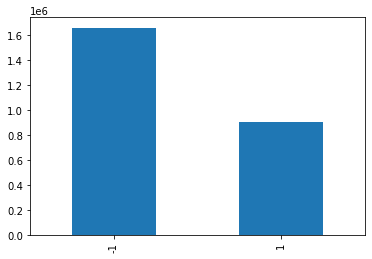

In [22]:
# Plotting the count of Negative value and the positive value
FAANG_binary.Cat_Polarity.value_counts().plot.bar()
FAANG_binary.Cat_Polarity.value_counts()

As we can see from the above barplot, the count for the negative values and positive values

Total Count - 2566858
1. Negative value - 1662303 [-1]
2. Positive value - 904555  [+1]

### Data Preprocessing

In [23]:
#Lower the text in comments
FAANG_binary['message'] = FAANG_binary['message'].str.lower()

In [24]:
# Displaying the first 10 rows of the dataset
FAANG_binary['message'].head(10)

0                                 aapl huh 39 happened
1    google yahoo search partnership may add shareh...
2                     aapl 39 done 180 easy div payout
3    twtr cramer likes twitter takeover thinks prob...
4    aapl 912 dow jones points week nice risk manag...
5    amzn msft aapl played trump giving insider inf...
6                             aapl hope algos go crazy
7    aapl amzn apple wil start pay taxes europe ful...
8                           amzn netflix earnings thur
9          jim cramer simply many ways win amazon aapl
Name: message, dtype: object

In [25]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc 
FAANG_binary.describe()

,label,polarity,Cat_Polarity
count,2.566858e+06,2.566858e+06,2.566858e+06
mean,5.287067e-01,7.348867e-02,-2.952045e-01
std,4.991753e-01,2.574732e-01,9.554343e-01
min,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,-1.000000e+00
50%,1.000000e+00,0.000000e+00,-1.000000e+00
75%,1.000000e+00,1.600000e-01,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00


In [26]:
## Find the information about the given DataFrame including the index dtype and column dtypes, non-null
FAANG_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566858 entries, 0 to 2566857
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   message       object 
 1   Date          object 
 2   label         int64  
 3   polarity      float64
 4   Cat_Polarity  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 97.9+ MB


In [27]:
FAANG_binary['message'][0]

'aapl huh 39 happened'

In [28]:
FAANG_binary['message'][0].strip()

'aapl huh 39 happened'

In [29]:
# Natural Language Toolkit, is a Python package that one use for NLP.
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\SAMARTH P
[nltk_data]     SHET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Punkt Sentence Tokenizer divides a text into a list of sentences, 
# by using an unsupervised algorithm to build a model for abbreviation words
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\SAMARTH P
[nltk_data]     SHET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [32]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
FAANG_binary['message'] = FAANG_binary['message'].str.strip()

In [35]:
train = FAANG_binary.copy()

In [36]:
train['message'] = train['message'].str.strip()

In [37]:
train['message'][0]

'aapl huh 39 happened'

In [38]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [39]:
FAANG_binary['stop_comments'] = FAANG_binary['message'].apply(lambda x : remove_stopwords(x))

In [40]:
FAANG_binary.head()

,message,Date,label,polarity,Cat_Polarity,stop_comments
0,aapl huh 39 happened,2015-11-12,0,0.000000,-1,aapl huh 39 happened
1,google yahoo search partnership may add shareh...,2015-07-10,1,0.000000,-1,google yahoo search partnership may add shareh...
2,aapl 39 done 180 easy div payout,2018-05-15,0,0.433333,1,aapl 39 done 180 easy div payout
3,twtr cramer likes twitter takeover thinks prob...,2015-06-16,1,0.000000,-1,twtr cramer likes twitter takeover thinks prob...
4,aapl 912 dow jones points week nice risk manag...,2016-01-07,0,0.442857,1,aapl 912 dow jones points week nice risk manag...


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(FAANG_binary['stop_comments'],
                                                 FAANG_binary['Cat_Polarity'],
                                                 test_size = 0.2,random_state = 324)

In [43]:
X_train.shape

(2053486,)

In [44]:
X_test.shape

(513372,)

In [45]:
FAANG_binary['Cat_Polarity'].value_counts()

-1    1662303
 1     904555
Name: Cat_Polarity, dtype: int64

### Implementing Logistic Regression

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [47]:
tf_train.shape

(2053486, 162815)

In [49]:
#import Logistic Regression classifer and fit on the Training dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

In [50]:
# Accuracy score on training dataset
lr.score(tf_train,y_train)

0.9906446890799353

In [51]:
# Accuracy on Test FAANG_binaryset
lr.score(tf_test,y_test)

0.9892826254645753

In [52]:
# Performing prediction on Test dataset
expected = y_test
predicted = lr.predict(tf_test)

In [53]:
# plot confusion matrix for the test dataset
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [54]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

[[178510   2535]
 [  2967 329360]]


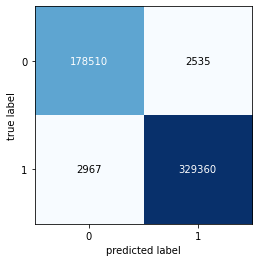

In [55]:
# plotting the confusion matrix
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
fig, ax = plot_confusion_matrix(conf_mat = cf)
plt.show()

In [56]:
print(metrics.classification_report(expected, predicted))
print("Confusion Matrix: ",metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99    332327
           1       0.98      0.99      0.98    181045

    accuracy                           0.99    513372
   macro avg       0.99      0.99      0.99    513372
weighted avg       0.99      0.99      0.99    513372

Confusion Matrix:  [[329360   2967]
 [  2535 178510]]


In [57]:
# Calculating F1 score
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.9882698074581957